<a href="https://colab.research.google.com/github/june1st/GoogleColab/blob/master/kmnist_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz -O kmnist-train-imgs.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz -O kmnist-train-labels.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz -O kmnist-test-imgs.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz -O kmnist-test-labels.npz

--2019-11-19 14:51:44--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18384171 (18M)
Saving to: ‘kmnist-train-imgs.npz’

kmnist-train-imgs.n 100%[===================>]  17.53M  6.00MB/s    in 2.9s    

2019-11-19 14:51:47 (6.00 MB/s) - ‘kmnist-train-imgs.npz’ saved [18384171/18384171]

--2019-11-19 14:51:49--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29700 (29K)
Saving to: ‘kmnist-train-labels.npz’

kmnist-train-labels 100%[===================>]  29.00K  --.-KB/s    in 0.1s    

2019-11-19 14:51:50 (235 KB/s) - ‘kmnist-train-labels.npz’ saved [29700/29

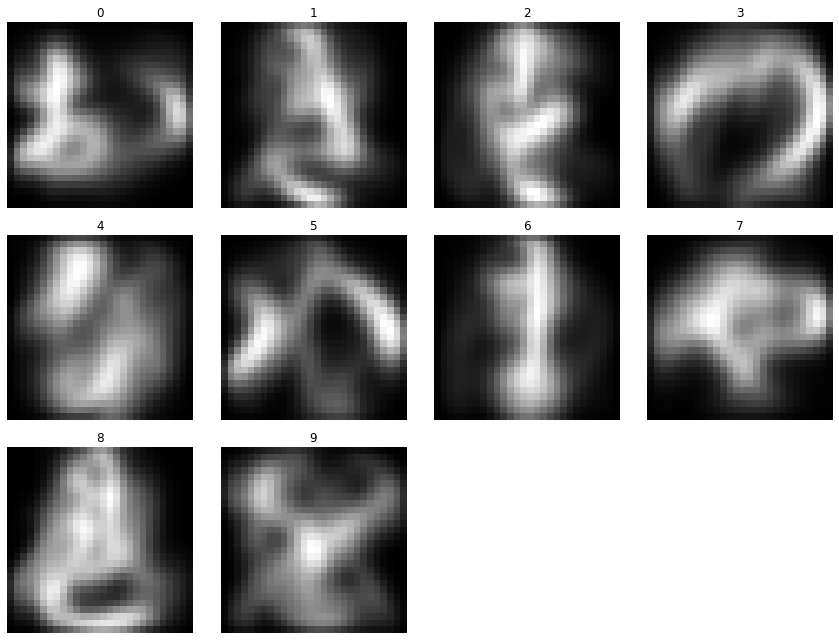

In [8]:
import numpy as np
import matplotlib.pyplot as plt

train_images = np.load('kmnist-train-imgs.npz')['arr_0']
train_labels = np.load('kmnist-train-labels.npz')['arr_0']
test_images = np.load('kmnist-test-imgs.npz')['arr_0']
test_labels = np.load('kmnist-test-labels.npz')['arr_0']

plt.figure(figsize=(12, 9))
for label in range(10):
    plt.subplot(3, 4, label + 1)
    indices = np.where(train_labels == label)
    mean_image = train_images[indices].mean(axis=0)
    plt.imshow(mean_image, cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout2d()
        self.fc1 = nn.Linear(9216, 128)
        self.dropout2 = nn.Dropout2d()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = x.view(-1, 9216)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [9]:
'''
PyTorch MNIST sample
'''
import argparse
import time
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import torch.optim as optim

#from net import Net


def parser():
    '''
    argument
    '''
    parser = argparse.ArgumentParser(description='PyTorch MNIST')
    parser.add_argument('--epochs', '-e', type=int, default=2,
                        help='number of epochs to train (default: 2)')
    parser.add_argument('--lr', '-l', type=float, default=0.01,
                        help='learning rate (default: 0.01)')
    args = parser.parse_args()
    return args


def main():
    '''
    main
    '''
    #args = parser()
    args_epochs =2
    args_lr=0.01

    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, ), (0.5, ))])

    train_images
    trainset = KMNIST(root='./data',
                     train=True,
                     download=True,
                     transform=transform)
    testset = KMNIST(root='./data',
                    train=False,
                    download=True,
                    transform=transform)
    '''
    trainset = MNIST(root='./data',
                     train=True,
                     download=True,
                     transform=transform)
    testset = MNIST(root='./data',
                    train=False,
                    download=True,
                    transform=transform)
    '''
    trainloader = DataLoader(trainset,
                             batch_size=100,
                             shuffle=True,
                             num_workers=2)
    testloader = DataLoader(testset,
                            batch_size=100,
                            shuffle=False,
                            num_workers=2)
    
    classes = tuple(np.linspace(0, 9, 10, dtype=np.uint8))

    # model
    net = Net()

    # define loss function and optimier
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(),
                          lr=args_lr, momentum=0.99, nesterov=True)

    # train
    for epoch in range(args_epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader, 0):
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 100 == 99:
                print('[{:d}, {:5d}] loss: {:.3f}'
                      .format(epoch+1, i+1, running_loss/100))
                running_loss = 0.0
    print('Finished Training')

    # test
    correct = 0
    total = 0
    with torch.no_grad():
        for (images, labels) in testloader:
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy: {:.2f} %'.format(100 * float(correct/total)))


if __name__ == '__main__':
    start_time = time.time()
    main()
    print('elapsed time: {:.3f} [sec]'.format(time.time() - start_time))

NameError: ignored

In [0]:
import os
import numpy as np
from torchvision.datasets.utils import makedir_exist_ok, download_url
from torch.utils.data import Dataset

class KujuMNIST_DS(Dataset):
    urls = [
        'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz',
        'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz',
        'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz',
        'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz',
    ]
    base_filename = 'kmnist-{}-{}.npz'
    data_filepart = 'imgs'
    labels_filepart = 'labels'
    
    def __init__(self, folder, train_or_test='train', download=False, num_classes=10, max_items=None, tfms=None):
        self.root = os.path.expanduser(folder)
        if download:
            self.download()
            
        self.train = (train_or_test == 'train')
        
        self.data = np.load(os.path.join(self.root, self.base_filename.format(train_or_test, self.data_filepart)))    
        self.data = self.data['arr_0']
        self.targets = np.load(os.path.join(self.root, self.base_filename.format(train_or_test, self.labels_filepart)))    
        self.targets = self.targets['arr_0']
        self.c = num_classes
        self.max_items = max_items
        self.tfms = tfms
    
    def __getitem__(self, index):
        """
        Args:
            index (int): Index
        Returns:
            tuple: (image, target) where target is index of the target class.
        """
        cur_data = np.expand_dims(self.data[index], axis=-1)

        if self.tfms:
            cur_data = self.tfms(cur_data)
        
        target = int(self.targets[index])
        img, target = cur_data, target
        
        return img, target

    def __len__(self):
        if self.max_items:
            return self.max_items
        return len(self.data)
    
    def download(self):
        makedir_exist_ok(self.root)
        for url in self.urls:
            filename = url.rpartition('/')[-1]
            file_path = os.path.join(self.root, filename)
            download_url(url, root=self.root, filename=filename, md5=None)

In [15]:
!wget https://raw.githubusercontent.com/rois-codh/kmnist/master/download_data.py

--2019-11-19 15:17:13--  https://raw.githubusercontent.com/rois-codh/kmnist/master/download_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3133 (3.1K) [text/plain]
Saving to: ‘download_data.py’

download_data.py    100%[===================>]   3.06K  --.-KB/s    in 0s      

2019-11-19 15:17:13 (57.5 MB/s) - ‘download_data.py’ saved [3133/3133]



In [0]:
!mkdir kuzu_mnist

In [17]:
%cd kuzu_mnist/

/content/kuzu_mnist


In [18]:
!python3 ../download_data.py

Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
> 1
Please select a download option:
1) MNIST data format (ubyte.gz)
2) NumPy data format (.npz)
> 2
100% 17954/17954 [00:02<00:00, 6019.68KB/s]
100% 30/30 [00:00<00:00, 238.09KB/s]
100% 3008/3008 [00:01<00:00, 2303.70KB/s]
100% 6/6 [00:00<00:00, 13819.78KB/s]
All dataset files downloaded!


In [26]:
%cd ..

/


In [12]:
!wget https://raw.githubusercontent.com/ranihorev/Kuzushiji_MNIST/master/KujuMNIST_dataset.py

--2019-11-19 15:15:12--  https://raw.githubusercontent.com/ranihorev/Kuzushiji_MNIST/master/KujuMNIST_dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2142 (2.1K) [text/plain]
Saving to: ‘KujuMNIST_dataset.py’

KujuMNIST_dataset.p 100%[===================>]   2.09K  --.-KB/s    in 0s      

2019-11-19 15:15:12 (52.2 MB/s) - ‘KujuMNIST_dataset.py’ saved [2142/2142]



In [0]:
from torchvision.models.resnet import resnet18, ResNet, BasicBlock
from torchvision.datasets.mnist import MNIST
from fastai.vision import * 
from fastai import *
import numpy as np
import torchvision.transforms as transforms
import torch.utils.data as data
from torch.autograd import Variable

from torchvision.datasets.utils import makedir_exist_ok, download_url
from torch.utils.data import BatchSampler, DataLoader
from torchvision import transforms
from KujuMNIST_dataset import KujuMNIST_DS

In [20]:
trn_data = np.load('./kuzu_mnist/kmnist-train-imgs.npz')
trn_data = trn_data['arr_0'] / 255
data_mean = trn_data.mean()
data_std = trn_data.std()
print(f'Mean: {data_mean}')
print(f'Std: {data_std}')

Mean: 0.1917621473589439
Std: 0.34834283034636876


In [0]:
default_device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

transform_train = transforms.Compose(
    [transforms.ToPILImage(), 
     #transforms.RandomAffine(degrees=7, translate=(0.1, 0.1), scale=(0.95, 1.05)), 
     transforms.ToTensor(),
     transforms.Normalize((data_mean,), (data_std,)),
    ])

transform_valid = transforms.Compose(
    [transforms.ToPILImage(), 
     transforms.ToTensor(),
     transforms.Normalize((data_mean,), (data_std,)),
    ])

ROOT_FOLDER = './kuzu_mnist/'

trn_ds = KujuMNIST_DS(ROOT_FOLDER, train_or_test='train', download=False, tfms=transform_train)
val_ds = KujuMNIST_DS(ROOT_FOLDER, train_or_test='test', download=False, tfms=transform_valid)

trn_dl = DataLoader(trn_ds, batch_size=128, shuffle=True, num_workers=1, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=128, shuffle=True, num_workers=1, pin_memory=True)
databunch = DataBunch(path=ROOT_FOLDER, train_dl=trn_dl, valid_dl=val_dl, device=default_device)

In [0]:
# dataset_transform = transforms.Compose([
#                transforms.ToTensor(),
#                transforms.Normalize((0.1307,), (0.3081,))
#            ])

# mnist_trn_ds = MNIST('./', train=True, download=False, transform=dataset_transform)
# mnist_val_ds = MNIST('./', train=False, download=False, transform=dataset_transform)

In [0]:
class VGG(nn.Module):  
    """
    Based on - https://github.com/kkweon/mnist-competition
    """
    def two_conv_pool(self, in_channels, f1, f2):
        s = nn.Sequential(
            nn.Conv2d(in_channels, f1, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(f1),
            nn.ReLU(inplace=True),
            nn.Conv2d(f1, f2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(f2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        for m in s.children():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
        return s
    
    def three_conv_pool(self,in_channels, f1, f2, f3):
        s = nn.Sequential(
            nn.Conv2d(in_channels, f1, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(f1),
            nn.ReLU(inplace=True),
            nn.Conv2d(f1, f2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(f2),
            nn.ReLU(inplace=True),
            nn.Conv2d(f2, f3, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(f3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        for m in s.children():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
        return s
        
    
    def __init__(self, num_classes=10):
        super(VGG, self).__init__()
        self.l1 = self.two_conv_pool(1, 64, 64)
        self.l2 = self.two_conv_pool(64, 128, 128)
        self.l3 = self.three_conv_pool(128, 256, 256, 256)
        self.l4 = self.three_conv_pool(256, 256, 256, 256)
        
        self.classifier = nn.Sequential(
            nn.Dropout(p = 0.5),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(p = 0.5),
            nn.Linear(512, num_classes),
        )
    
    def forward(self, x):
        x = self.l1(x)
        x = self.l2(x)
        x = self.l3(x)
        x = self.l4(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return F.log_softmax(x, dim=1)

In [24]:
learn = Learner(databunch, VGG(), metrics=accuracy)
learn.load('vgg_model_with_norm')
print('Model was loaded')

FileNotFoundError: ignored

In [27]:
ls

bin/      dev/   lib32/  opt/   sbin/   tensorflow-2.0.0/  var/
boot/     etc/   lib64/  proc/  srv/    tmp/
content/  home/  media/  root/  swift/  tools/
datalab/  lib/   mnt/    run/   sys/    usr/


In [28]:
%cd content/

/content


In [29]:
ls

download_data.py        kmnist-train-imgs.npz    kuzu_mnist/
kmnist-test-imgs.npz    kmnist-train-labels.npz  __pycache__/
kmnist-test-labels.npz  KujuMNIST_dataset.py     sample_data/


In [30]:
%cd kuzu_mnist/

/content/kuzu_mnist


In [31]:
ls

kmnist-test-imgs.npz    kmnist-train-imgs.npz
kmnist-test-labels.npz  kmnist-train-labels.npz


(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


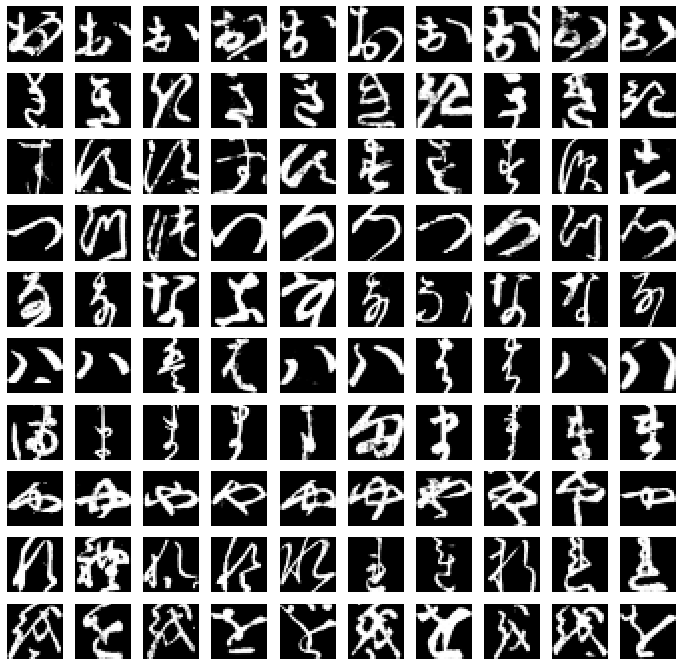

In [33]:
import numpy as np
import matplotlib.pyplot as plt
 
x_train = np.load('kmnist-train-imgs.npz')['arr_0']
x_test = np.load('kmnist-test-imgs.npz')['arr_0']
y_train = np.load('kmnist-train-labels.npz')['arr_0']
y_test = np.load('kmnist-test-labels.npz')['arr_0']
 
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
 
fig,axes = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
for r in range(10):
    data = x_train[y_train==r]
    for c in range(10):
        axes[r, c].axis("off")
        axes[r, c].imshow(data[c], cmap='Greys_r')
plt.savefig('kmnist.png')
plt.show()
 

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 512)          401920      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_16[0][0]                   
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense_16[0][0]                   
____________________________________________________________________________________________

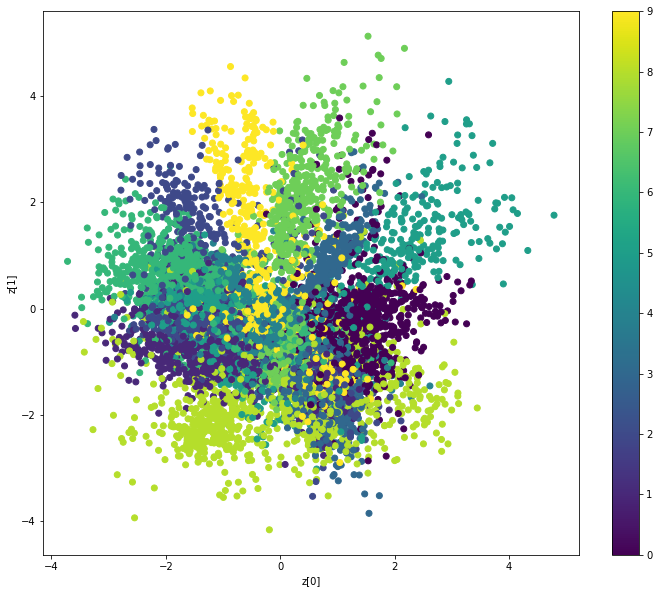

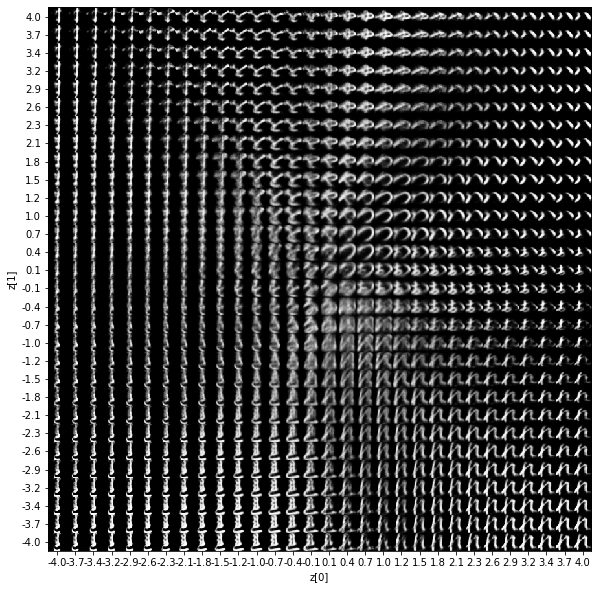

In [41]:
'''Example of VAE on MNIST dataset using MLP
The VAE has a modular design. The encoder, decoder and VAE
are 3 models that share weights. After training the VAE model,
the encoder can be used to generate latent vectors.
The decoder can be used to generate MNIST digits by sampling the
latent vector from a Gaussian distribution with mean = 0 and std = 1.
# Reference
[1] Kingma, Diederik P., and Max Welling.
"Auto-Encoding Variational Bayes."
https://arxiv.org/abs/1312.6114
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os


# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    """Plots labels and MNIST digits as a function of the 2D latent vector
    # Arguments
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = (n - 1) * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()


# MNIST dataset
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.load('kmnist-train-imgs.npz')['arr_0']
x_test = np.load('kmnist-test-imgs.npz')['arr_0']
y_train = np.load('kmnist-train-labels.npz')['arr_0']
y_test = np.load('kmnist-test-labels.npz')['arr_0']
 

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 128
latent_dim = 2
epochs = 50

# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    help_ = "Load h5 model trained weights"
    parser.add_argument("-w", "--weights", help=help_)
    help_ = "Use mse loss instead of binary cross entropy (default)"
    parser.add_argument("-m",
                        "--mse",
                        help=help_, action='store_true')
    args = parser.parse_args(args=[])
    models = (encoder, decoder)
    data = (x_test, y_test)

    # VAE loss = mse_loss or xent_loss + kl_loss
    if args.mse:
        reconstruction_loss = mse(inputs, outputs)
    else:
        reconstruction_loss = binary_crossentropy(inputs,
                                                  outputs)

    reconstruction_loss *= original_dim
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')
    vae.summary()
    plot_model(vae,
               to_file='vae_mlp.png',
               show_shapes=True)

    if args.weights:
        vae.load_weights(args.weights)
    else:
        # train the autoencoder
        vae.fit(x_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(x_test, None))
        vae.save_weights('vae_mlp_mnist.h5')
    
    plot_results(models,
                 data,
                 batch_size=batch_size,
                 model_name="vae_mlp")
    

done
100
100


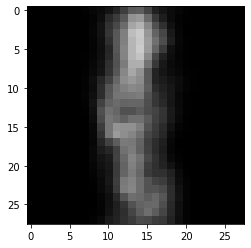

In [65]:
%matplotlib inline
import cv2
# 半径　r の円周上の画像を　n個取得
r = 2
n = 100

x1 = np.linspace(-np.pi, np.pi, n) 
y1 = np.linspace(-np.pi, np.pi, n) 
x = r*np.cos(x1)
y = r*np.sin(y1)
    
for i in range(len(x)):
    z_sample = np.array([[x[i], y[i]]])
    x_decoded = decoder.predict(z_sample)
    digit =  x_decoded[0].reshape(28, 28)
    plt.imshow(digit, cmap='Greys_r')   
    plt.savefig("fig//"+"{0:04d}".format(i)+'fig.png')
    #im = cv2.cvtColor(digit, cv2.COLOR_GRAY2RGB)
    #cv2.imwrite(r"fig/"+"{0:04d}".format(i)+'fig.png', im)
    print(i)
print(len(x))
plt.imshow(im, cmap='Greys_r')   
cv2.imwrite('fig.png', im)

    
# n個の画像からGIF動画を作成する    
from PIL import Image
import glob

files = sorted(glob.glob('fig/*.png'))
images = list(map(lambda file: Image.open(file), files))
print(len(images))
images[0].save('kmnist.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

In [0]:
!mkdir fig

In [66]:
ls

fig/        kmnist-test-imgs.npz     vae_mlp/             vae_mlp.png
fig.png     kmnist-test-labels.npz   vae_mlp_decoder.png
kmnist.gif  kmnist-train-imgs.npz    vae_mlp_encoder.png
kmnist.png  kmnist-train-labels.npz  vae_mlp_mnist.h5
